<center> <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> I.F. Paloma Rodriguez Medel </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Feb 2023 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/PalomaRM/Laboratorio_1'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Lab 1 </font> <br> <br> <font color= #555555> <font size = 5> Some interesting title for your work  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

Hoy en día se han vuelto muy populares los ETF's, los cuales son un fondo que cotiza en bolsa, ofreciendole a las personas la oportunidad de invertir en una cartera realizada por profesionales para maximizar sus ganancias, en lugar de manejar de manera diaria sus movimientos de compra y venta. El objetivo de este laboratorio era comparar la inversión activa y pasiva del NAFTRAC en donde podíamos replicar durante 2 años los movimientos del ETF o realizar nuestros propios movimientos utilizando los mismos activos incluidos en el índice. Se dice que la inversion en ETF está enfocada mayormente a largo plazo, mientras que la inversión activa es para personas con un enfoque mas analítico.

<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

In [1]:
from pathlib import Path
import pandas as pd
import glob
import pandas_datareader.data as web
import re
import yfinance as yf
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import locale
locale.setlocale( locale.LC_ALL, '' )
#import functions as fn
#import data as dt
import main as mn

## <font color= #6B6B6B> 2.2 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas>=1.1.1 
- numpy>=1.19.1
- jupyter>=1.0.0
- _Add any other here_

## <font color= #6B6B6B> 2.3 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/NAFTRAC.csv : Precios históricos
- files/closes.txt : Datios diarios Yahoo Finance

## <font color= #6E6E6E> 2.3 Install Packages</font>

In [2]:
%%capture

# Install all the pip packages in the requirements.txt
import sys
!{sys.executable} -m pip install -r requirements.txt

<br>

# <font color= #6B6B6B> 3. Data Description </font>

<hr style="border:0.02in solid gray"> </hr>

Para la realización de este proyecto utilizamos 25 archivos con los datos históricos de 2 años del NAFTRAC entre los periodos del 01/29/2021 al 01/25/2023, utilizando el último día hábil del mes. Cada archvio tenia 16 columnas y al rededor de 36 filas dependiendo de los rebalanceos. Las columnas eran:
- Ticker: etiqueta de cotización
- Nombre: Nombre del activo
- Clase de activo: Equity
- Peso (%): ponderación
- Precio: Precio promedio del activo del día
- Acciones: cantidad de acciones
- Valor de mercado
- Valor nominal
- Sector
- ISIN: identificador internacional
- Bolsa de valores: BMV
- Ubicación: Mexico
- Moneda: MXN
- Mercado de divisas: MXN
- Tipo de Cambio

Solamente se utilizaron las columnas de Ticker y Peso (%).

Los tickers incluidos cada mes pueden variar, para el laboratorio solamente era necesario utilizar los que se repetían en los 25 archivos, por lo que se trabajó con 31 tickers y se eliminaron 11. Se utilizaron los siguientes:

In [3]:
mn.unique

['AC.MX',
 'OMAB.MX',
 'GRUMAB.MX',
 'KIMBERA.MX',
 'ALFAA.MX',
 'LIVEPOLC-1.MX',
 'MEGACPO.MX',
 'MXN.MX',
 'ORBIA.MX',
 'GFNORTEO.MX',
 'PE&OLES.MX',
 'PINFRA.MX',
 'Q.MX',
 'TLEVISACPO.MX',
 'VESTA.MX',
 'WALMEX.MX',
 'GMEXICOB.MX',
 'KOFUBL.MX',
 'GFINBURO.MX',
 'ELEKTRA.MX',
 'ALSEA.MX',
 'AMXL.MX',
 'ASURB.MX',
 'BBAJIOO.MX',
 'BIMBOA.MX',
 'BOLSAA.MX',
 'CUERVO.MX',
 'CEMEXCPO.MX',
 'FEMSAUBD.MX',
 'GAPB.MX',
 'GCARSOA1.MX',
 'GCC.MX']

El precio que aparecía en la columna de 'Precio' dentro de los archivos no era el precio de cierre del dia, por lo se hizo una descarga de los precios de cierre de la plataforma Yahoo Finance utilizando la libreria *yfinance* de las fechas 29/01/2021 al 25/01/2023. Se limpiaron los nombres que no coincidían con la plataforma porque tenían * y les hacía falta agregar .MX para identificar las acciones en la plataforma.

<br>

# <font color= #6B6B6B> <font size = 6> 4. Results </font>

<hr style="border:0.02in solid gray"> </hr>

El objetivo del laboratorio era comprarar los resultados que obteniamos en la inversion pasiva y en la activa, por lo que se hizo una tabla comparativa con 3 medidas como el rendimiento promedio mensual, rendimiento promedio acumulado y Radio Sharpe. Para la inversión activa se mantuvieron los pesos de NAFTRAC que se utilizaban en el primer archivo, por lo que no hubo comisiones de rebalanceo después del primer mes. En la inversión activa se construyó un portafolio eficiente maximizando el radio de Sharpe, utilizando los rendimientos logarítmicos diarios. Se obtuvieron los siguientes resultados:

In [4]:
mn.df_medidas

,Medida,Descripcion,inv_Pasiva,inv_Activa
0,rend_m,Rendimiento Promedio Mensual,0.070434,2.418411
1,rend_c,Rendimiento Promedio Acumulado,18.989564,272.575478
2,sharpe,Radio de Sharpe,2.605393,3.018808


La inversión activa obtuvo el mayo

<br>

## <font color= #6B6B6B> 5.1 Results Passive </font>

In [5]:
mn.res_pasiva

,capital,rend,rend_acum
timestamp,,,
29/01/2021,856921.78,NaN,NaN
02/02/2021,873775.89,0.019668,0.019668
03/02/2021,878953.93,0.005926,0.025594
04/02/2021,880233.06,0.001455,0.027050
05/02/2021,878067.09,-0.002461,0.024589
...,...,...,...
18/01/2023,1156787.38,0.003175,0.324373
19/01/2023,1158114.99,0.001148,0.325520
20/01/2023,1170172.94,0.010412,0.335932


<br>

## <font color= #6B6B6B> 5.2 Results of active </font>

Con el fin de tener una tabla de resultados mas clara, se junto el df_activa y df_operaciones. Se rebalanceaba con los precios diarios con las siguientes reglas:
- Disminuir en un 2.5% la posición en títulos de aquellos activos cuyo precio disminuyó un 5% o más
- Aumentar en un 2.5% la posición en títulos de aquellos activos cuyo precio aumentó un 5% o más
- Considera pagar las mismas comisiones por rebalanceo para cada cambio de posición con cada activo según aplique

#### Frontera de mínima varianza
Se realizó el calculo de la frontera de mínima varainza como parte del proceso de la inversión activa. Se obtuvo el siguiente resultado:

In [6]:
mn.frontera

,Media,Vol,RS
0,139.181350,3841.532403,0.036220
1,139.135294,3702.619751,0.037566
2,139.089238,3566.249551,0.038990
3,139.043182,3432.421805,0.040496
4,138.997126,3301.136511,0.042093
5,138.951070,3172.393669,0.043787
6,138.905013,3046.193280,0.045585
7,138.858957,2922.535344,0.047499
8,138.812901,2801.419860,0.049536
9,138.766845,2682.846829,0.051708


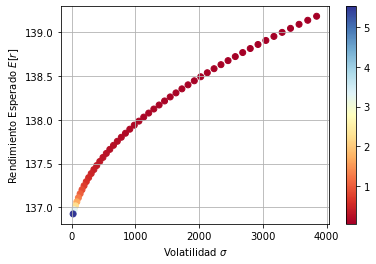

In [7]:
mn.frontera_ef(mn.frontera)

#### Portafolio eficiente
Con los pesos obtenidos se construyó el siguiente portafolio eficiente utilizando las siguientes acciones: 

In [8]:
mn.titulos_pef

,index,Pesos%,Postura,Precio,Titulos
4,ASURB.MX,1.463652,14636.519344,404.209961,36.0
7,BOLSAA.MX,31.015362,310153.619233,36.755547,8438.0
10,ELEKTRA.MX,1.962774,19627.740146,1543.668213,13.0
17,GMEXICOB.MX,8.578882,85788.818874,84.621071,1014.0
18,GRUMAB.MX,17.172056,171720.563109,253.802933,677.0
20,KOFUBL.MX,9.479587,94795.867683,96.044899,987.0
22,MEGACPO.MX,8.504113,85041.131130,66.381622,1281.0
25,PE&OLES.MX,5.417238,54172.377992,235.559998,230.0
27,Q.MX,16.183124,161831.243974,97.639099,1657.0
29,VESTA.MX,0.223212,2232.118513,41.094971,54.0


#### Operaciones
Se hizo una iteración diaria con los datos del año2 y se obtuvo el siguiente resultado:

In [9]:
mn.df_op

,timestamp,titulos_totales,titulos_op,cash_acum,comision_x_op,comision_acum,rend,rend_acum
0,2022-03-01,14028.0,14028.0,1000000,0.000,0.000000e+00,0.000000,0.000000
1,2022-03-02,14379.0,351.0,1025099.672,1281.375,1.281375e+03,0.025100,0.025100
2,2022-03-03,14738.0,359.0,1050716.286,1313.395,2.594770e+03,0.024989,0.050089
3,2022-03-04,15107.0,369.0,1076985.359,1346.232,3.941002e+03,0.025001,0.075090
4,2022-03-07,15482.0,375.0,1103023.596,1378.779,5.319781e+03,0.024177,0.099267
...,...,...,...,...,...,...,...,...
224,2023-01-18,3180130.0,77564.0,213891795.984,267364.745,1.075452e+07,0.026766,5.430806
225,2023-01-19,3259634.0,79504.0,219608646.668,274510.808,1.102903e+07,0.026728,5.457534
226,2023-01-20,3341124.0,81490.0,225486873.457,281858.592,1.131089e+07,0.026767,5.484301
227,2023-01-23,3424653.0,83529.0,231539280.589,289424.101,1.160031e+07,0.026842,5.511142


Se realizaron únicamente 2 ventas de títulos en el año.


In [10]:
mn.ventas

,timestamp,titulos_totales,titulos_op,cash_acum,comision_x_op,comision_acum,rend,rend_acum
62,2022-05-31,62213.0,-294.0,4370409.979,5463.012,180129.264,0.008819,1.492739
71,2022-06-13,75441.0,-311.0,5335531.37,6669.414,235487.980,0.008988,1.694601


<br>

# <font color= #6B6B6B> <font size = 6> 6. References </font>

<hr style="border:0.02in solid gray"> </hr>

- Anotaciones de clase de Portafolios de inversión (repositorio ya no disponible en Github).
- Documentación Python
- Documentación pandas
- Documentación yhfinance

<br>

<hr style="border:0.02in solid red"> </hr>